# Lab 3 : Working with Neural Networks

---


Total Points: **100**


Submission Deadline :  **08 April 2022, 23:59 hours**


In case of any queries, please contact the TAs Aroof Aimen (2018csz0001@iitrpr.ac.in), Vidhya Kamakshi (2017csz0005@iitrpr.ac.in)

---



General Instructions:

---



1. You have to do this lab individually
2. **You have to perform the custom implementation in Part 1 of the assignment.** Libraries like **Keras or torch.nn are not allowed** for part 1 (except where it is mentioned).
3. Please start early as some of the experiments take time to run 
4. All the code should be submitted in the form of a single Jupyter/colab notebook.
5. Points for each sub-section are mentioned in the questions.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. Submission must be done in the Google classroom. The code as well as the accompanying observations should be made part of the colab notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes and functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
9. You are expected to submit your **detailed inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. **Please make a 10-minute video explaining your lab. Please provide a link to your video shared via the google drive in your notebook itslef (in a seperate text block). Follow the following naming convention: Name_rollnumber_NB.ipynb and Name_rollnumber_video.mkv respectively.** 
12. **Submissions without links for the videos, incorrect naming conventions, or incorrect folder arrangement will not be evaluated.**


In this lab, we will perform one **regression** and one **multi-class classification** tasks. We will consider the Boston house Price Dataset for the regression problem, and for multi-class classification, we will consider Fashion-MNIST Dataset. For Boston house Price dataset details visit - https://scikit-learn.org/stable/datasets/toy_dataset.html. For Fashion-MNIST dataset you may get it using keras (see documentation) Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist


---



Section 1:  **(Total points = 50)**

---

Q1. Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the house prices (Dataset loading function and accessing data matrix and target values have been provided in the code section) *Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section*

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Also, show the coorelation of each column with the target values in the dataset using multi-plots. **(3 point)**
2. Perform data pre-processing operations like standardization and splitting (80:20) of data.  **(2 points)**
3. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh actionations at each layer of MLP for the user.  **( 15 points)**
4. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(15 points)**
5. Train your model using the Mean Sqaured Errors. Mention your choices of the hyperparameters for training. Perform traning with batch gradient descent and stochastic gradeint descent. Plot the graph of traning error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the traning methods. **(2+3 = 5)**
6. Using the best traning method from the above traning, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001].  **(5 points)**
7. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus lerning rate. Comment on your observations. **(3+2 = 5 points)**

In [1]:
#Declaration Block
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

np.random.seed(0)
warnings.filterwarnings("ignore")

In [2]:
housing = load_boston() # Loading the housing data
housing

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
data = pd.DataFrame(housing["data"]) # Input data 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
housing["feature_names"] # List of features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
target = pd.DataFrame(housing["target"]) # Ground truth house prices for each row of data
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
# Exploratory Analysis
analysis = data.describe()
analysis.columns = housing["feature_names"]
analysis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


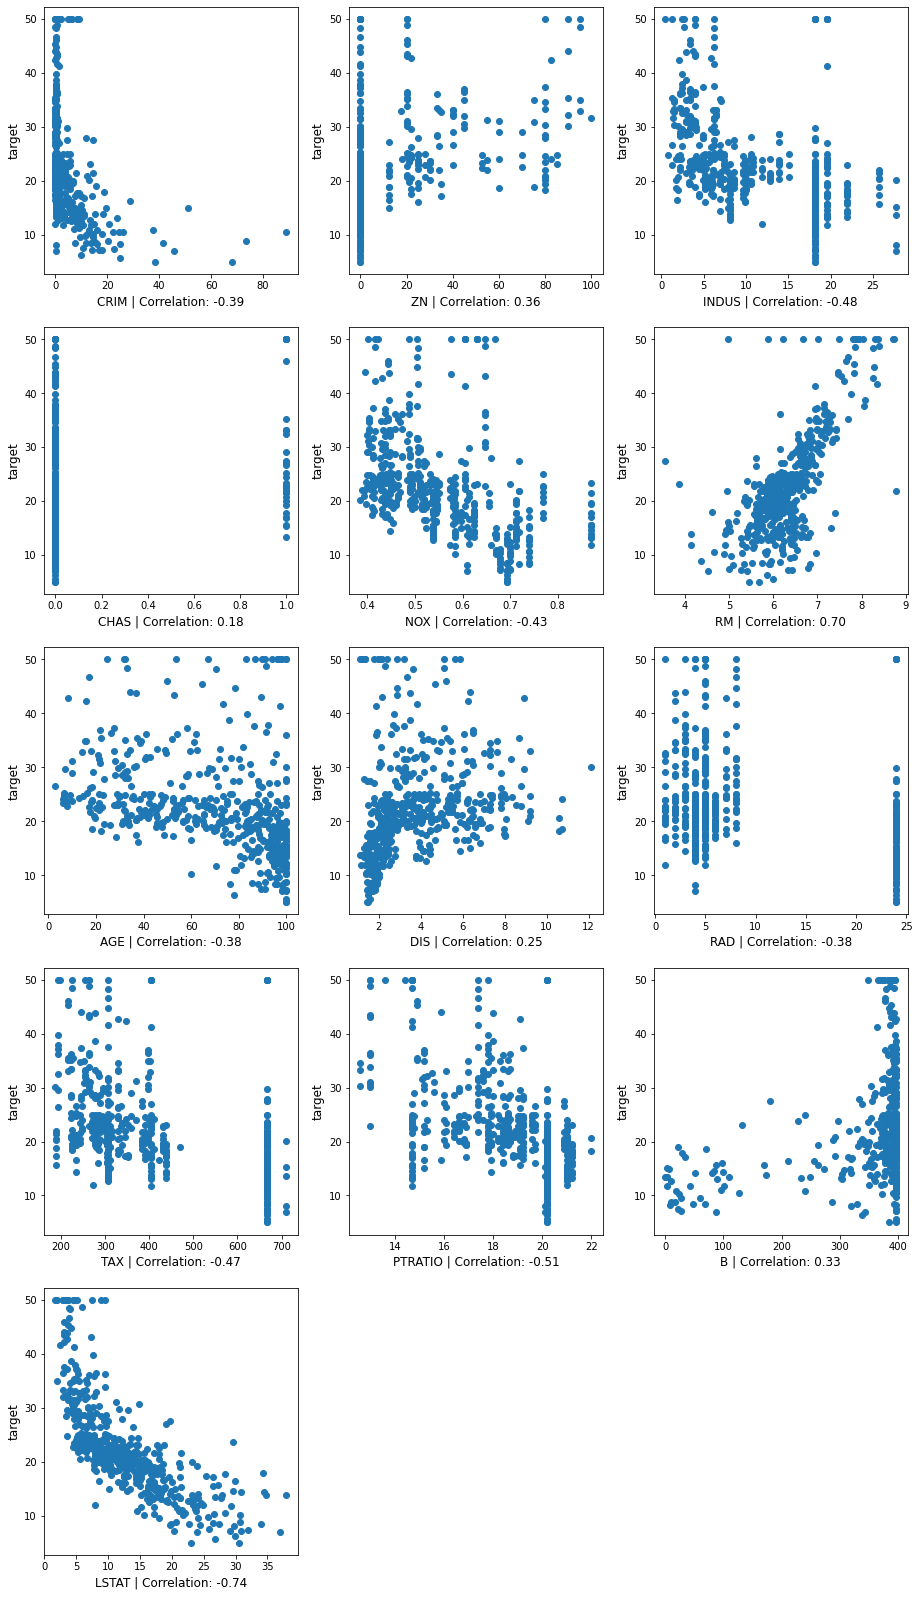

In [7]:
# correlation of each column with target

num_features = len(housing["feature_names"])
feature_names = housing["feature_names"]

label_font_size = 12

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

plt.subplots_adjust(left=0.5, top=1.2)

y = target[0].to_numpy()
y_mean = np.mean(y)
del_y = (y - y_mean)

for i in range(num_features):
    x = data[i].to_numpy()
    x_mean = np.mean(x)
    del_x = (x - x_mean)
    
    correlation = np.sum(del_x * del_y) / np.sqrt(np.sum(del_x**2) * np.sum(del_y**2))
    
    plt.subplot(num_features // 3 + 1, 3, i+1)
    plt.xlabel(f'{feature_names[i]} | Correlation: {correlation:.2f}\n', fontsize = label_font_size)
    plt.ylabel('target', fontsize = label_font_size)
    
    plt.scatter(x, y)
    
plt.show()

In [8]:
# Standardize and Splitting Dataset

data_mean = data.mean()
data_std = data.std()
data_standardized = (data - data_mean) / data_std

validation_fraction = 0.8
split_mask = np.random.uniform(0, 1, (len(data_standardized))) < validation_fraction

train_data = data_standardized[split_mask].to_numpy()
validation_data = data_standardized[~split_mask].to_numpy()

train_target = target[split_mask].to_numpy()
validation_target = target[~split_mask].to_numpy()

In [9]:
# We will perform customized forward and backward propagation



# Define Abstract class
class Layer():
    def __init__(self, num_nodes, num_prev_layer_nodes):
        self.num_nodes = num_nodes
        self.prev_layer_num_nodes = num_prev_layer_nodes
        
        self.weights = np.random.rand(num_nodes, num_prev_layer_nodes)
        self.biases = np.random.rand(num_nodes, 1)
        
        self.z = None
        self.x = None
        self.back_gradient = None


# Define Fully connected Layer
class FCLayer(Layer):
    def __init__(self, num_nodes, num_prev_layer_nodes):
        super().__init__(num_nodes, num_prev_layer_nodes)
        
  # Forward Propagation
    def forward(self, X):
        self.x = X
        z = (X @ ((self.weights).T)) + self.biases.T
        return z

  # Backward Propagation
    def backward(self, output_gradient, lr=0.1):
        grad_w = (output_gradient.T) @ self.x
        grad_b = np.sum(output_gradient.T, axis=1, keepdims=True)
        grad_x = (output_gradient) @ self.weights
        
        # weight and bias update
        self.weights -= lr * grad_w
        self.biases -= lr * grad_b
        
        # updating gradient to be propagated to previous layer
        self.back_gradient = grad_x
        
        return grad_x


# Activation Layer (ReLU) 
class ActivationLayer(Layer):
    def __init__(self, num_nodes, activation_function, activation_function_derivative):
        super().__init__(num_nodes, num_nodes)
        self.weights = self.biases = None
        
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
            
    # Forward Propagation
    def forward(self, X):
        self.z = self.activation_function(X)
        return self.z

    # Backward Propagation
    def backward(self, output_gradient, lr=0.1):
        grad_x = output_gradient * self.activation_function_derivative(self.z)
        self.back_gradient = grad_x
        return grad_x

# Define activation function and its derivative

sigmoid = {
    "function": (lambda x: 1 / (1 + np.exp(-x))),
    "derivative": (lambda x: x*(1-x))
}

tanh = {
    "function": (lambda x: 1 - (2 / (np.exp(2*x) + 1))),
    "derivative": (lambda x: 1-(x**2))
}

linear = {
    "function": (lambda x: x),
    "derivative": (lambda x: 1)
}

In [10]:
# Define Loss function (Use mean square error)

# y : output
# y_: target
mse = {
    "function": (lambda y, y_: np.mean((y-y_)**2)),
    "derivative": (lambda y, y_: 2*(y - y_) / len(y))
}

In [11]:
# Implement Backpropagation
class MLP:
    def __init__(self, layers = [13, 15, 1], activations = [tanh, linear], loss = mse):
        self.loss = loss
        
        self.layers = []
        for i in range(len(layers) - 1):
            self.layers.append(
                FCLayer(layers[i+1], layers[i])
            )
            self.layers.append(
                ActivationLayer(layers[i+1], activations[i]["function"], activations[i]["derivative"])
            )
    
    def forward(self, X):
        z = X
        for i in self.layers:
            z = i.forward(z)
        
        return z
    
    def backward(self, y, y_, lr = 0.1):
        grad = self.loss["derivative"](y, y_)
        for i in self.layers[::-1]:
            grad = i.backward(grad, lr)
    
    def get_loss(self, y, y_):
        return self.loss["function"](y, y_)
            
    def train(self, X, Y, lr = 0.1, batch_size = None):
        if (batch_size == None):
            batch_size = len(X)
            
        for i in range(0, len(X), batch_size):
            z = self.forward(X[i: i+batch_size])
            self.backward(z, Y[i: i+batch_size], lr)
            
        z = self.forward(X)
        return z
    
    def test(self, X, Y):
        z = self.forward(X)
        return self.get_loss(z, Y)

In [12]:
# Train Function

def train(model, epochs, update_frequency = None):
    warnings.filterwarnings("error")
    
    if (update_frequency == None): update_frequency = max(1, epochs / 100)
    loss_array = []
    
    y = model.forward(train_data)
    l = model.get_loss(y, train_target)
    loss_array.append(l)
    print(f'MSE Loss at Iteration 0 ==> {l: 0.16f}', end='\r')
    
    for _ in range(1, epochs+1):
        try:
            y = model.train(train_data, train_target, lr)
            l = model.get_loss(y, train_target)

            loss_array.append(l)
            if (_ % update_frequency == 0):
                print(f'MSE Loss at Iteration {_} ==> {l: 0.16f}', end='\r')
                
        except RuntimeWarning:
            print(f'\nOverflow Occurred', end='\r')
            break
    
    print()
    
    warnings.filterwarnings("ignore")
    return loss_array

In [13]:
# Training Network
epochs = int(1e5)

nn_batch_tanh = MLP(layers = [13, 15, 1], activations = [tanh, linear], loss = mse)
nn_batch_sigmoid = MLP(layers = [13, 15, 1], activations = [sigmoid, linear], loss = mse)
nn_stochastic_tanh = MLP(layers = [13, 15, 1], activations = [tanh, linear], loss = mse)
nn_stochastic_sigmoid = MLP(layers = [13, 15, 1], activations = [sigmoid, linear], loss = mse)

lr = 0.01

print(f"\n\nBatch Gradient Descent with tanh")
loss_batch_tanh = train(nn_batch_tanh, epochs)

print(f"\n\nBatch Gradient Descent with sigmoid")
loss_batch_sigmoid = train(nn_batch_sigmoid, epochs)

print(f"\n\nStochastic Gradient Descent with tanh")
loss_stochastic_tanh = train(nn_stochastic_tanh, epochs)

print(f"\n\nStochastic Gradient Descent with sigmoid")
loss_stochastic_tanh = train(nn_stochastic_sigmoid, epochs)



Batch Gradient Descent with tanh
MSE Loss at Iteration 100000 ==>  1.4002445757432753


Batch Gradient Descent with sigmoid
MSE Loss at Iteration 100000 ==>  1.0456573991059046


Stochastic Gradient Descent with tanh
MSE Loss at Iteration 100000 ==>  1.1285123760527327


Stochastic Gradient Descent with sigmoid
MSE Loss at Iteration 100000 ==>  0.8955640283839865


In [14]:
# Training the best model for different learning rates

# Stochastic Gradient Descent with Sigmoid
loss_mse = {}
learning_rates = [0.5, 0.1, 0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    
    models[lr] = MLP(layers = [13, 15, 1], activations = [sigmoid, linear], loss = mse)
    
    print(f"\n\nStochastic Gradient Descent with sigmoid, learning rate = {lr}")
    loss_mse[lr] = train(models[lr], epochs)



Stochastic Gradient Descent with sigmoid, learning rate = 0.5
MSE Loss at Iteration 0 ==>  438.2962149845276372
Overflow Occurred


Stochastic Gradient Descent with sigmoid, learning rate = 0.1
MSE Loss at Iteration 100000 ==>  0.7620617916532368


Stochastic Gradient Descent with sigmoid, learning rate = 0.01
MSE Loss at Iteration 100000 ==>  1.5899745162452810


Stochastic Gradient Descent with sigmoid, learning rate = 0.001
MSE Loss at Iteration 100000 ==>  2.7490721442637147


Stochastic Gradient Descent with sigmoid, learning rate = 0.0001
MSE Loss at Iteration 100000 ==>  9.4146127186665058


Overflow had occurred for learning rate: 0.5
Overflow had occurred for learning rate: 0.5


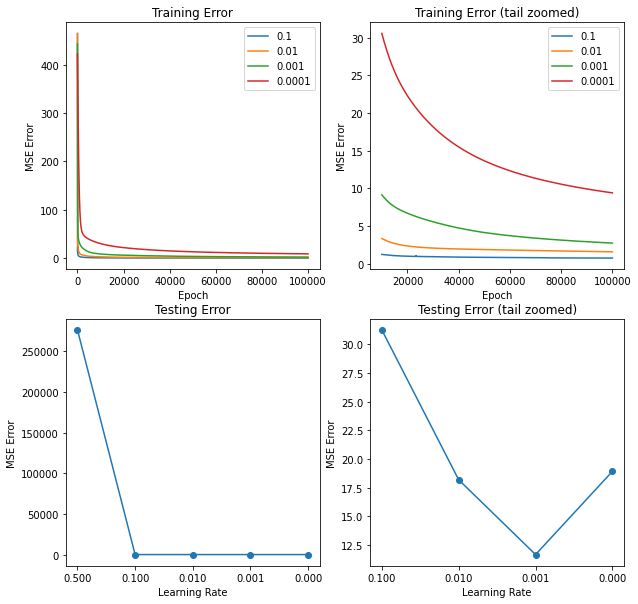

In [15]:
# Plots

####################### MSE vs Epoch

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.subplot(2, 2, 1)

for lr in learning_rates:
    if (len(loss_mse[lr]) != epochs + 1):
        print(f"Overflow had occurred for learning rate: {lr}")
        continue
    x = list(range(epochs+1))
    y = loss_mse[lr]
    plt.plot(x, y, label=str(lr))
plt.legend()
plt.title('Training Error')
plt.xlabel('Epoch')
plt.ylabel('MSE Error')

####################### Tail MSE vs Epoch
plt.subplot(2, 2, 2)

for lr in learning_rates:
    if (len(loss_mse[lr]) != epochs + 1):
        print(f"Overflow had occurred for learning rate: {lr}")
        continue
    x = list(range(int(0.1 * epochs), epochs+1))
    y = loss_mse[lr][int(0.1 * epochs):]
    plt.plot(x, y, label=str(lr))
plt.legend()
plt.title('Training Error (tail zoomed)')
plt.xlabel('Epoch')
plt.ylabel('MSE Error')

####################### MSE vs Learning Rate

plt.subplot(2, 2, 3)

x = [f'{lr:.3f}' for lr in learning_rates]
y = [models[lr].test(validation_data, validation_target) for lr in learning_rates]

plt.plot(x, y)
plt.scatter(x, y)

plt.title('Testing Error')
plt.xlabel('Learning Rate')
plt.ylabel('MSE Error')

####################### Tail MSE vs Learning Rate

plt.subplot(2, 2, 4)

x = [f'{lr:.3f}' for lr in learning_rates[1:]]
y = [models[lr].test(validation_data, validation_target) for lr in learning_rates[1:]]

plt.plot(x, y)
plt.scatter(x, y)

plt.title('Testing Error (tail zoomed)')
plt.xlabel('Learning Rate')
plt.ylabel('MSE Error')

plt.show()

In [16]:
# Challenges and Observations

# Model Structure 
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf

'''
Input layer
Con2D with 32 3x3 kernals and ReLU activation
Max Pooling layer with pool-size 2x2
Con2D with 64 3x3 kernals and ReLU ReLU activation
Max Pooling layer with size 2x2
Dropout
Fully Connected Layer with softmax activation
'''

model = Sequential()
model.add(Dense(15, input_dim=13, kernel_initializer=tf.keras.initializers.GlorotUniform(), activation='tanh'))
model.add(Dense(1, kernel_initializer=tf.keras.initializers.GlorotUniform()))
model.compile(loss='mean_squared_error')

x = model.fit(train_data, train_target, epochs=10000)


---



Section 2:  **(Total points = 50)**

---
Q2. In this question, we will learn to perform multi-class classification on Fashion-MNIST using a convolutional neural network. 


1. Explore the Dataset. Display one randomly selected image from each fashion class. **(5 points)**

2. Plot the distribution of number of images in each fashion class. Is the distribution uniform? Comment. **(5 points)**

3. Implememnt the 2D convolution function using a kernel size of 3x3. Use the [sobel kernel](https://en.wikipedia.org/wiki/Sobel_operator) and display the feature map for one example from each fashion class. For using sobel kernel, you need to calculate two convolutions, one for x-direction (x) and one for y-direction (y), the feature map then can be calculated as $F_m = \sqrt(x^2 + y^2)$**(10 points)**

4. Using the Keras library, implement a CNN model for classification. Use the following network architecture:  **(5 points)**
*  Input layer
*  Con2D with 32 3x3 kernals and ReLU activation
*  Max Pooling layer with pool-size 2x2
*  Con2D with 64 3x3 kernals and ReLU ReLU activation
*  Max Pooling layer with size 2x2
*  Dropout
*  Fully Connected Layer with softmax activation

3. Implement a custom cross-entropy loss (error function) for the multi-class classification. Use it for traning the model. **(5 points)**

4. Compile and train your model with four different optimizers viz. SGD
RMSprop, Adam, Adagrad. Plot the training loss for all four optimizers. Comment on your observations. **(10 points)**

5. Choose different hyperparameters for Conv Layers, change number of Conv layer and drop-out rate and train your model. Plot training and test accuracies and losses wrt epochs for different hyper-parameters. Do you find any improvement in classification performance. Report your analysis. **(10 points)**


In [1]:
# import Fashion MNIST dataset
import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

2022-04-05 17:23:32.706802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 17:23:32.706822: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
fashion_data = fashion_mnist.load_data() #load dataset
fashion_data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

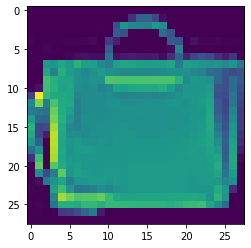

Label: 8


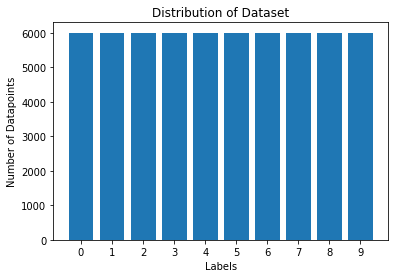

In [3]:
#Dataset Exploration

'''
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

'''

from tensorflow.keras.utils import to_categorical

(train_data, train_target), (validation_data, validation_target) = fashion_data

# data point
index = np.random.randint(0, len(train_data))
im = plt.imshow(train_data[index])
label = train_target[index]

plt.show(im)
print(f'Label: {label}')

# distribution of dataset
labels = list(set(train_target))
x = []
y = []
for i in sorted(labels):
    x.append(str(i))
    y.append(list(train_target).count(i))

plt.bar(x, y)
plt.title("Distribution of Dataset")
plt.xlabel("Labels")
plt.ylabel("Number of Datapoints")
plt.show()

train_data = train_data.reshape((*train_data.shape, 1))
validation_data = validation_data.reshape((*validation_data.shape, 1))

train_target = to_categorical(train_target)
validation_target = to_categorical(validation_target)

In [4]:
# Model Structure 
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D, MaxPooling2D

'''
Input layer
Con2D with 32 3x3 kernals and ReLU activation
Max Pooling layer with pool-size 2x2
Con2D with 64 3x3 kernals and ReLU ReLU activation
Max Pooling layer with size 2x2
Dropout
Fully Connected Layer with softmax activation
'''

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

2022-04-05 17:23:37.731452: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-05 17:23:37.731478: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (den): /proc/driver/nvidia/version does not exist
2022-04-05 17:23:37.731693: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Implement the loss (cross-entropy)
import keras.backend as K

# y_: targets
# y : predictions
def cross_entropy(y_, y):
    loss = K.log(1e-15+y)
    loss = K.prod(y_, loss)
    loss = K.sum(loss, axis=1)
    print(loss.shape)
    loss = -1 * loss
    return loss

In [9]:
tensor

In [6]:
train_data.shape, train_target.shape

((60000, 28, 28, 1), (60000, 10))

In [7]:
# Compile and fit the model

learning_rate = 0.01
model.compile(loss=cross_entropy, optimizer=adam_v2.Adam(learning_rate=learning_rate))
model.fit(train_data, train_target)

TypeError: in user code:

    File "/media/sagalpreet/Data/Sagal/Coursework/IIT-Ropar/Sem-6/ML/2019/assignments/Machine-Learning-CS503/assignment-3/.venv/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_19454/3320195276.py", line 8, in cross_entropy  *
        loss = K.prod(y_, loss)
    File "/media/sagalpreet/Data/Sagal/Coursework/IIT-Ropar/Sem-6/ML/2019/assignments/Machine-Learning-CS503/assignment-3/.venv/lib/python3.8/site-packages/keras/backend.py", line 2564, in prod
        return tf.reduce_prod(x, axis, keepdims)

    TypeError: Value passed to parameter 'reduction_indices' has DataType float32 not in list of allowed values: int32, int64


In [25]:
preds = model.predict(validation_data)
preds = np.argmax(preds, axis = 1)
target = np.argmax(validation_target, axis = 1)

In [26]:
np.sum(((preds - target) == 0)*1)

1000

In [75]:
preds

array([9, 2, 1, ..., 8, 1, 7])

In [101]:
np.argmax(validation_target[:5], axis=1)

array([9, 2, 1, 1, 6])

In [102]:
model.predict(validation_data[0:1])

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [25]:
# Test the model


1875/1875 [==============================] - 23s 12ms/step - loss: 0.8105


In [ ]:
# Plots

In [ ]:
# Challenges and observations